# Introduction 

Welcome to our machine learning project on predicting car prices! In this project, we aim to develop a predictive model that can estimate the price of a car based on its various features and characteristics.
We will use a dataset of historical car sales that includes features such as make, model, year, mileage, engine size, transmission type, and more. We will apply various machine learning algorithms to build a predictive model that can accurately estimate the price of a car based on these features.


## Problem Statement 

The problem statement for our machine learning project on predicting car prices is to develop a model that can accurately estimate the price of a car based on its various features and characteristics.

To summarize the problem statement we are building a machine learning model for prediction of car price

### Importing Necessary Libraries 

In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

### Importing the dataset 

In [3]:
df = pd.read_csv(r"C:\Users\ITVEDANT10\Downloads\cars (1).csv")

In [4]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


### Dataset description 

The dataset consist of 15 columns with 14 Features and 1 target i.e. 'price' 

Diffrent Features available can be called using a code.

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


There are 8 columns with Datatype object

### Removing the null values

In [8]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Value counts check

In [9]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [10]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [11]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [12]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
128     6
104     6
134     6
103     5
85      5
168     5
74      5
95      5
65      5
94      5
102     5
122     4
93      4
106     4
118     4
148     4
83      3
137     3
125     3
101     3
115     3
154     3
87      2
197     2
113     2
81      2
110     2
153     2
188     2
192     2
164     2
194     2
119     2
108     2
89      2
158     2
145     2
129     2
98      1
121     1
142     1
90      1
186     1
77      1
256     1
78      1
107     1
231     1
Name: normalized-losses, dtype: int64

In [13]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
101     6
88      6
62      6
160     6
114     6
102     5
97      5
82      5
76      5
84      5
145     5
123     4
111     4
92      4
86      4
182     3
90      3
152     3
85      3
207     3
121     3
73      3
112     2
100     2
52      2
94      2
56      2
184     2
176     2
161     2
162     2
?       2
155     2
156     2
106     1
135     1
120     1
115     1
64      1
55      1
288     1
72      1
200     1
154     1
48      1
143     1
134     1
140     1
142     1
175     1
262     1
78      1
58      1
60      1
Name: horsepower, dtype: int64

In [14]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [15]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

from above value counts situtation we havent found null values but there are multiple zero values present in the data we have to create the zero values to nan values 

In 'normalized-losses' and 'horsepower' there are values which contain '?' ,now we will remove this using a lib SimpleImputer 

#### Replacing Process 

In [16]:
df['horsepower'].replace('?',np.nan,inplace=True)
df['normalized-losses'].replace('?',np.nan,inplace=True)

#### Simple Imputer 

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
si  = SimpleImputer(missing_values=np.nan,strategy='mean')


In [19]:
df[['normalized-losses','horsepower']]= si.fit_transform(df[['normalized-losses','horsepower']])

### Seprating Targets and Features 

In [20]:
features = df.iloc[:,:-1]

In [21]:
target = df.iloc[:,-1]

## Removing Outliers

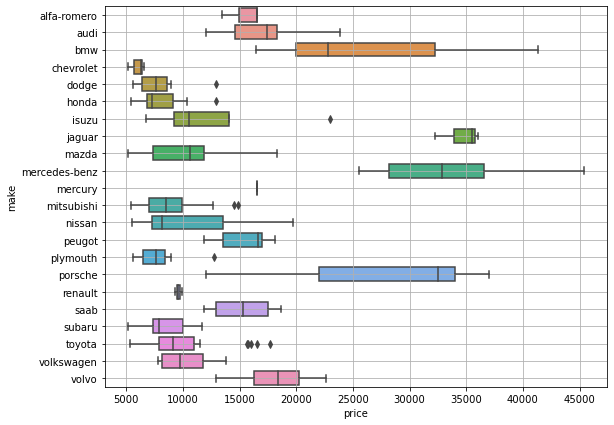

In [22]:
plt.figure(figsize=(9,7))
sns.boxplot( x='price',y='make',data=df)
plt.grid()
plt.show()

In [23]:
features[(features['make']=="dodge")& (target>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24


In [24]:
features[(features['make']=="dodge")& (target>10000)]
features.drop(29,axis=0,inplace=True)
target.drop(29,axis=0,inplace=True)

In [25]:
features[(features['make']=="honda")& (target>12000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28


In [26]:
features.drop(41,axis=0,inplace=True)
target.drop(41,axis=0,inplace=True)

In [27]:
features[(features['make']=="mitsubishi")& (target>13000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24


In [28]:
features.drop([83,84],axis=0,inplace=True)
target.drop([83,84],axis=0,inplace=True)

In [29]:
features[(features['make']=="isuzu")& (target>20000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43


In [30]:
features.drop(45,axis=0,inplace=True)
target.drop(45,axis=0,inplace=True)

In [31]:
features[(features['make']=="plymouth")& (target>10000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24


In [32]:
features.drop(124,axis=0,inplace=True)
target.drop(124,axis=0,inplace=True)

In [33]:
features[(features['make']=="renault")& (target>8000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
130,0,122.0,renault,gas,wagon,fwd,front,66.5,55.2,ohc,132,104.256158,23,31
131,2,122.0,renault,gas,hatchback,fwd,front,66.6,50.5,ohc,132,104.256158,23,31


In [34]:
features.drop([130,131],axis=0,inplace=True)
target.drop([130,131],axis=0,inplace=True)

In [35]:
features[(features['make']=="toyota")& (target>15000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24


In [36]:
features.drop([172,178,179,180,181],axis=0,inplace=True)
target.drop([172,178,179,180,181],axis=0,inplace=True)

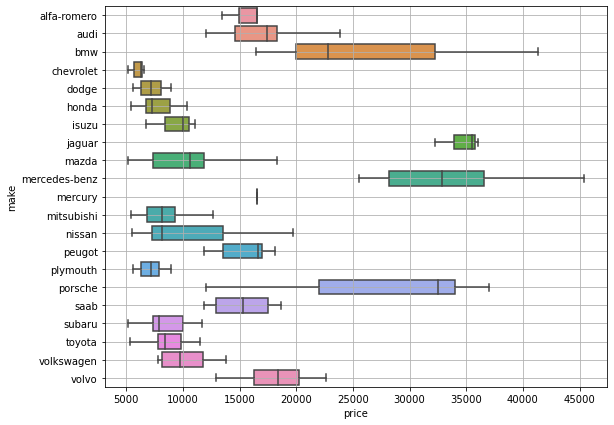

In [37]:
plt.figure(figsize=(9,7))
sns.boxplot(x=target,y='make',data=features)
plt.grid()
plt.show()

## Skewness

In [38]:
features.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
dtype: object

In [39]:
colname = features.select_dtypes(['int64','float64']).columns

In [40]:
colname

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [41]:
from scipy.stats import skew

In [42]:
skew(df['normalized-losses'])

0.8485348696008058

In [43]:
for i in colname:
    print(i)
    print(skew(df[i]))

symboling
0.20952469094997359
normalized-losses
0.8485348696008058
width
0.8973753485201392
height
0.06265991683394276
engine-size
1.9333748457840114
horsepower
1.3875147343096037
city-mpg
0.6588377533622138
highway-mpg
0.5360379305163596


Using vizualization tools to watch the skewness carefully and getting some insights out of it .

## vizualization insights

symboling
0.21680498808856835


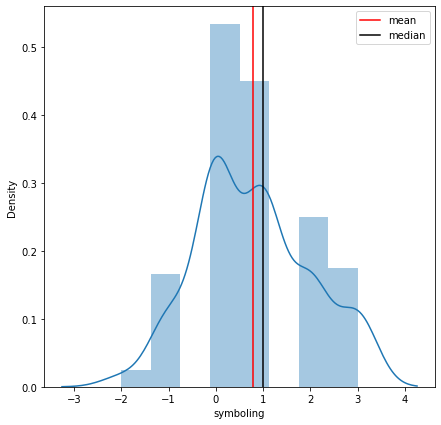

normalized-losses
0.8444205837314254


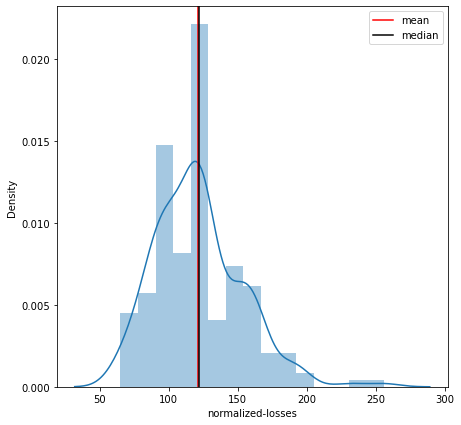

width
0.9196971380212939


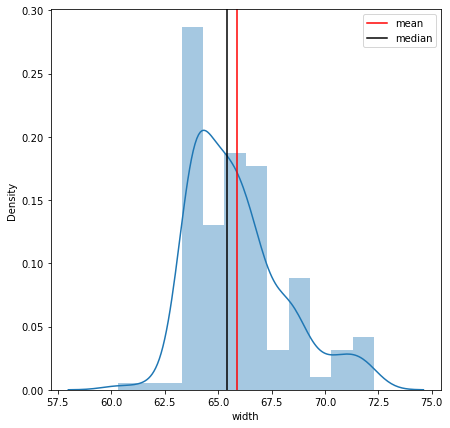

height
0.013754019877847854


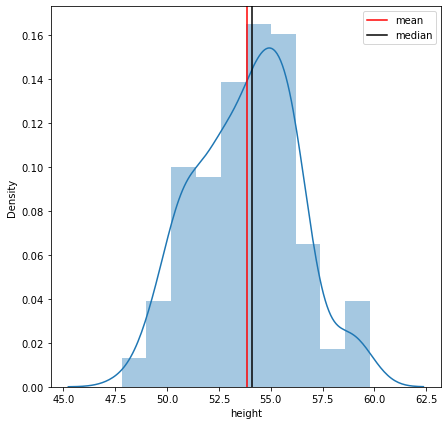

engine-size
2.0489360901881692


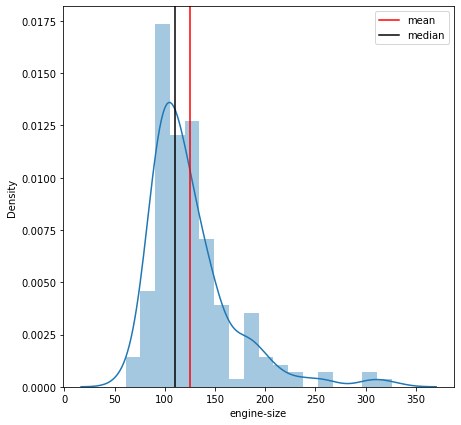

horsepower
1.5491171297512778


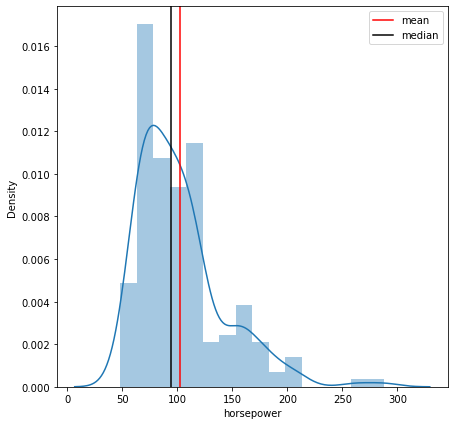

city-mpg
0.5871063086925044


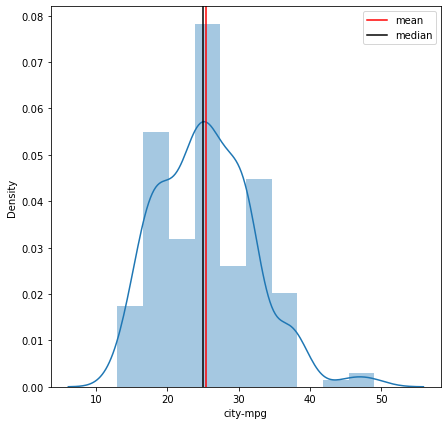

highway-mpg
0.4736409580604422


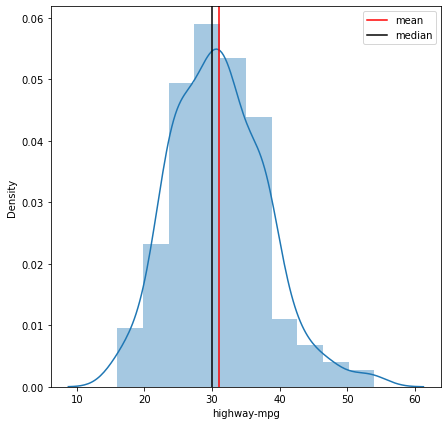

In [44]:
for i in features[colname]:
    print(i)
    print(skew(features[i]))
    
    
    plt.figure(figsize=(7,7))
    sns.distplot(features[i],hist=True)
    plt.axvline(features[i].mean(),color='red',label='mean')
    plt.axvline(features[i].median(),color='black',label='median')
    plt.legend()
    plt.show()

#### Checking the correlation

In [45]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.105790,0.071389,-0.035823,0.034606,-0.085781
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.110997,0.203434,-0.218749,-0.178221,0.133424
width,-0.232919,0.084195,1.000000,0.279210,0.735433,0.642195,-0.642704,-0.677218,0.718253
height,-0.541038,-0.370706,0.279210,1.000000,0.067149,-0.110137,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.110997,0.735433,0.067149,1.000000,0.810713,-0.653658,-0.677470,0.852995
horsepower,0.071389,0.203434,0.642195,-0.110137,0.810713,1.000000,-0.803162,-0.770903,0.746589
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.653658,-0.803162,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.677470,-0.770903,0.971337,1.000000,-0.679048
price,-0.085781,0.133424,0.718253,0.132444,0.852995,0.746589,-0.654611,-0.679048,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

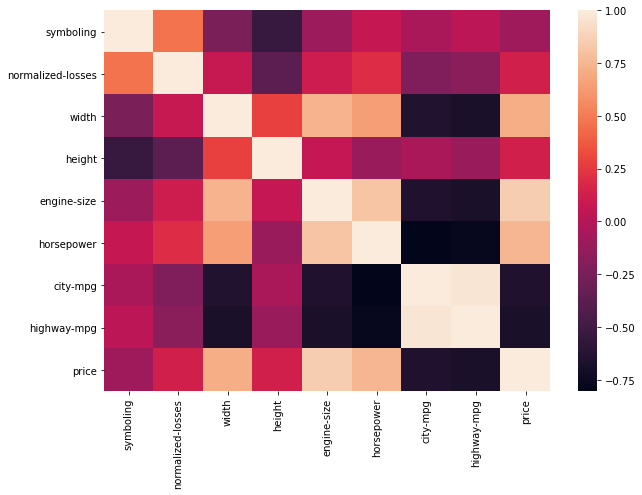

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())
plt.show

Correlation should be less and skew value should be more in this situation we remove Skewness

### Removing Skewness

There are 2 techniques taking square root and using log 


we will be using log method because it gives least values

In [47]:
features['normalized-losses']=np.log(features['normalized-losses'])

In [48]:
skew(features['normalized-losses'])

0.02289171969989671

we have find Skewed data and also removed it 

Now the problem arises that to predict our data should be in integer format so here we will use encoding techniques to encode the data 

## Encoding

we will be using ordinal encoder to encode the data 

In [76]:
categorical = df.select_dtypes(['object']).columns

In [77]:
categorical

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [78]:
from sklearn.preprocessing import OrdinalEncoder
oe  = OrdinalEncoder()

In [79]:
oe.fit_transform(df[categorical])

array([[ 0.,  1.,  0.,  2.,  0.,  0.],
       [ 0.,  1.,  0.,  2.,  0.,  0.],
       [ 0.,  1.,  2.,  2.,  0.,  5.],
       ...,
       [21.,  1.,  3.,  2.,  0.,  5.],
       [21.,  0.,  3.,  2.,  0.,  3.],
       [21.,  1.,  3.,  2.,  0.,  3.]])

In [80]:
df[categorical] = oe.fit_transform(df[categorical])

In [81]:
features

array([[ 1.84540319,  0.1469278 , -1.98865048, ...,  0.21793307,
        -0.67657925, -0.57745092],
       [ 1.84540319,  0.1469278 , -1.98865048, ...,  0.21793307,
        -0.67657925, -0.57745092],
       [ 0.17802713,  0.1469278 , -1.98865048, ...,  1.30905221,
        -0.98151638, -0.72237978],
       ...,
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.80155494,
        -1.13398494, -1.15716636],
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.09105876,
         0.08576357, -0.57745092],
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.29405766,
        -0.98151638, -0.86730864]])

now we have to do scaling so that our data will be more standardize and it would be very helpful for the model creation purpose 

## Standard Scalar

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(features)

array([[ 1.84540319,  0.1469278 , -1.98865048, ...,  0.21793307,
        -0.67657925, -0.57745092],
       [ 1.84540319,  0.1469278 , -1.98865048, ...,  0.21793307,
        -0.67657925, -0.57745092],
       [ 0.17802713,  0.1469278 , -1.98865048, ...,  1.30905221,
        -0.98151638, -0.72237978],
       ...,
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.80155494,
        -1.13398494, -1.15716636],
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.09105876,
         0.08576357, -0.57745092],
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.29405766,
        -0.98151638, -0.86730864]])

In [83]:
features= sc.fit_transform(features)

In [84]:
features

array([[ 1.84540319,  0.1469278 , -1.98865048, ...,  0.21793307,
        -0.67657925, -0.57745092],
       [ 1.84540319,  0.1469278 , -1.98865048, ...,  0.21793307,
        -0.67657925, -0.57745092],
       [ 0.17802713,  0.1469278 , -1.98865048, ...,  1.30905221,
        -0.98151638, -0.72237978],
       ...,
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.80155494,
        -1.13398494, -1.15716636],
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.09105876,
         0.08576357, -0.57745092],
       [-1.48934893, -0.83666999,  1.39929   , ...,  0.29405766,
        -0.98151638, -0.86730864]])

## Importing Train Test split 

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.30,random_state=1)

In this process we are going to train our data for future Predictions 

# Building the model 

### Importing the Algorithm 

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [87]:
linreg = LinearRegression()
knn = KNeighborsRegressor()
dt= DecisionTreeRegressor()
svm  = SVR()


Importing the metrics to check r2_score

In [88]:
from sklearn.metrics import r2_score

In [89]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("R2 SCORE = ",r2_score(y_test,y_pred))
    
    train = model.score(X_train,y_train)
    test = model.score(X_test,y_test)
    
    print("training score = ",train)
    print('testing score  = ',test)

## Linear Regression 

In [90]:
mymodel(linreg)

R2 SCORE =  0.831658898144517
training score =  0.8745718210763144
testing score  =  0.831658898144517


## KNeighbors Regressor

In [91]:
mymodel(knn)

R2 SCORE =  0.704991120192842
training score =  0.8452391456425085
testing score  =  0.704991120192842


## Decision Tree Regressor

In [92]:
mymodel(dt)

R2 SCORE =  0.8908265397763401
training score =  0.9950511364647535
testing score  =  0.8908265397763401


## SVR

In [93]:
mymodel(svm)

R2 SCORE =  -0.18466161088676802
training score =  -0.13375813893881316
testing score  =  -0.18466161088676802


### Observation

From the above observation we can conclude that the Decision Tree model is the best model

There is a huge diffrence beetween training and testing score i.e

training score =  0.9950511364647535

testing score  =  0.8825105063397883

diffrence = 0.11254063012496518

it shows the diffrence of almost 11% which is huge and can be an obstruction to our predictive model accuracy 

so we are going to use loop method for minimizing the diffrence in their training and testing by using some decision tree tools 

### Hyperparameter tuning process using loop 

### max_depth

In [94]:
for i in range (1,51):
    dt1=DecisionTreeRegressor(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    print(f'max depth  {i}   R2 SCORE = {r2_score(y_test,y_pred)}')

max depth  1   R2 SCORE = 0.7136071673320757
max depth  2   R2 SCORE = 0.8914785602609945
max depth  3   R2 SCORE = 0.8755179699502483
max depth  4   R2 SCORE = 0.9070533170339619
max depth  5   R2 SCORE = 0.9071125420989933
max depth  6   R2 SCORE = 0.8877722566252122
max depth  7   R2 SCORE = 0.8915889958688205
max depth  8   R2 SCORE = 0.8912358921656061
max depth  9   R2 SCORE = 0.8931166102987113
max depth  10   R2 SCORE = 0.8903387725643495
max depth  11   R2 SCORE = 0.8964211196565839
max depth  12   R2 SCORE = 0.8981101571327181
max depth  13   R2 SCORE = 0.8904703892395543
max depth  14   R2 SCORE = 0.8959665467037603
max depth  15   R2 SCORE = 0.8909515389135378
max depth  16   R2 SCORE = 0.8893270837903808
max depth  17   R2 SCORE = 0.9018103676261366
max depth  18   R2 SCORE = 0.8928055825962531
max depth  19   R2 SCORE = 0.89264623020417
max depth  20   R2 SCORE = 0.901232848619939
max depth  21   R2 SCORE = 0.8876005222217976
max depth  22   R2 SCORE = 0.8841002553359264


Best max depth value is 5

### min_sample_split

In [97]:
for i in range (2,51):
    dt1=DecisionTreeRegressor(min_samples_split=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    print(f'min_samples_split  {i}   R2 SCORE = {r2_score(y_test,y_pred)}')

min_samples_split  2   R2 SCORE = 0.8861813219356006
min_samples_split  3   R2 SCORE = 0.9016669357865222
min_samples_split  4   R2 SCORE = 0.9057062658491984
min_samples_split  5   R2 SCORE = 0.9098087689875932
min_samples_split  6   R2 SCORE = 0.9123505588407164
min_samples_split  7   R2 SCORE = 0.9219340704004206
min_samples_split  8   R2 SCORE = 0.9247696858600503
min_samples_split  9   R2 SCORE = 0.914850342786153
min_samples_split  10   R2 SCORE = 0.912595392244192
min_samples_split  11   R2 SCORE = 0.9197013719736772
min_samples_split  12   R2 SCORE = 0.8992186935704021
min_samples_split  13   R2 SCORE = 0.8992186935704021
min_samples_split  14   R2 SCORE = 0.8989894005263229
min_samples_split  15   R2 SCORE = 0.905638996308614
min_samples_split  16   R2 SCORE = 0.9054029366224159
min_samples_split  17   R2 SCORE = 0.9058225524601273
min_samples_split  18   R2 SCORE = 0.9061025804958214
min_samples_split  19   R2 SCORE = 0.9061025804958214
min_samples_split  20   R2 SCORE = 0.90

Best min_Sample_split value is 11

### max_leaf_nodes

In [99]:
for i in range (2,51):
    dt1=DecisionTreeRegressor(max_leaf_nodes=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    print(f'max_leaf_nodes  {i}   R2 SCORE = {r2_score(y_test,y_pred)}')

max_leaf_nodes  2   R2 SCORE = 0.7136071673320757
max_leaf_nodes  3   R2 SCORE = 0.8836339918338674
max_leaf_nodes  4   R2 SCORE = 0.8914785602609945
max_leaf_nodes  5   R2 SCORE = 0.8858124848799035
max_leaf_nodes  6   R2 SCORE = 0.876643457483152
max_leaf_nodes  7   R2 SCORE = 0.8755179699502483
max_leaf_nodes  8   R2 SCORE = 0.8866032793182402
max_leaf_nodes  9   R2 SCORE = 0.8882363195214775
max_leaf_nodes  10   R2 SCORE = 0.8994786699789327
max_leaf_nodes  11   R2 SCORE = 0.9120674578106522
max_leaf_nodes  12   R2 SCORE = 0.9162481279017528
max_leaf_nodes  13   R2 SCORE = 0.9263513993403283
max_leaf_nodes  14   R2 SCORE = 0.9218094529824661
max_leaf_nodes  15   R2 SCORE = 0.9197018035580372
max_leaf_nodes  16   R2 SCORE = 0.921620097427578
max_leaf_nodes  17   R2 SCORE = 0.9187844819679483
max_leaf_nodes  18   R2 SCORE = 0.9218740255116229
max_leaf_nodes  19   R2 SCORE = 0.9168598847349325
max_leaf_nodes  20   R2 SCORE = 0.9167182768153581
max_leaf_nodes  21   R2 SCORE = 0.9063072

Best max_leaf_nodes value is 13

Now by using diffrent tools in decision tree i.e. max depth ,min_samples_split , max_leaf_nodes we will increase the prediction power

In [100]:
Dt1 = DecisionTreeRegressor(max_depth=5,min_samples_split=11,max_leaf_nodes=13,random_state=1)

In [101]:
mymodel(Dt1)

R2 SCORE =  0.9273676198232992
training score =  0.9271829420089414
testing score  =  0.9273676198232992
